In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import tensorflow as tf

# Preprocess the data

In [2]:
# Import Dataset
charity_df =pd.read_csv('./Resources/charity_data.csv')
charity_df .head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# What variable(s) are considered the target(s) for your model?
# Target: IS_SUCCESSFUL

# What variable(s) are considered the feature(s) for your model? 
#Features: APPLICATION_TYPE, AFFILIATION, CLASSIFICATION,
#           USE_CASE, ORGANIZATION, STATUS, INCOME_AMT,
#           SPECIAL_CONSIDERATIONS, ASK_AMT

In [4]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
charity_df = charity_df.drop(labels=["EIN", "NAME"], axis=1)
charity_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [5]:
# Determine the number of unique values in each column.
charity_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [6]:
# For those columns that have more than 10 unique values, determine the number of data points for each unique value.
charity_counts = charity_df["APPLICATION_TYPE"].value_counts()
charity_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

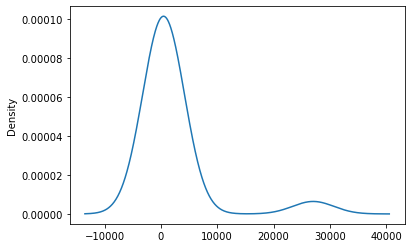

In [7]:
# Visualize the value counts of APPLICATION_TYPE
charity_counts.plot.density()

In [8]:
# Determine which values to replace if counts are less than 1800
replace_class = list(charity_counts[charity_counts < 1800].index)

# Replace in dataframe
for cls in replace_class:
    charity_df["CLASSIFICATION"] = charity_df["CLASSIFICATION"].replace(cls, "Other")
    
# Check to make sure bucketing was successful
charity_df["CLASSIFICATION"].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2190        1
C1732        1
C4200        1
C8210        1
C1283        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [9]:
# Generate our categorical variable lists
charity_cat = list(charity_df.dtypes[charity_df.dtypes == "object"].index)
charity_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [10]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(charity_df[charity_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(charity_cat)
encode_df.head()

,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [11]:
# Merge one-hot encoded features and drop the originals
charity_df = charity_df.merge(encode_df, left_index=True, right_index=True)
charity_df = charity_df.drop(labels=charity_cat, axis=1)
charity_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
# Split our preprocessed data into our features and target arrays
y = charity_df["IS_SUCCESSFUL"].values.reshape(-1, 1)
X = charity_df.drop("IS_SUCCESSFUL", axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Compile, Train and Evaluate the Model

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
# number of layer1 neurons = 2*(number of inputs=43) = 86 ~ 80
hidden_nodes_layer1 = 80
# number of layer2 neurons: Between (input=80) and (output=1 - classifier)
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

In [16]:
# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))  # binary clasifier -> 1 output neuron/sigmoid activation


In [26]:
# Check the structure of the model
#How many neurons, layers, and activation functions did you select for your neural network model, and why?
nn.summary()
# 1st Hidden Layer: 3520 params = [43 inputs (from input layer) * 80 neurons] + (80 bias terms)
# 2nd Hidden Layer: 2430 params = [80 inputs (from 1st hidden layer) * 30 neurons] + (30 bias terms)
# Output Layer: 31 params = [30 inputs (from 2nd hidden layer) * 1 neuron] + (1 bias term)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                9360      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 11,821
Trainable params: 11,821
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [19]:
# Add model weight checkpoints during training
import os
from tensorflow.keras.callbacks import ModelCheckpoint
os.makedirs("checkpoints/", exist_ok=True)
checkpoint_path="checkpoints/weights.{epoch}.hdf5"

# Create callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                              verbose=1,
                              save_weights_only=True,
                              save_freq="epoch",
                              period=5)

In [20]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5741 - accuracy: 0.7182
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5545 - accuracy: 0.7275
Epoch 3/100
804/804 [==============================] - 1s 990us/step - loss: 0.5503 - accuracy: 0.7292
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5478 - accuracy: 0.7294: 0s - los
Epoch 5/100
769/804 [===========================>..] - ETA: 0s - loss: 0.5460 - accuracy: 0.7314
Epoch 00005: saving model to checkpoints\weights.5.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5466 - accuracy: 0.7312
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5445 - accuracy: 0.7323
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5442 - accuracy: 0.7302
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5432 - accuracy: 0.7328
Epoch 9/100
804/804 [==================

804/804 [==============================] - 1s 1ms/step - loss: 0.5305 - accuracy: 0.7387
Epoch 63/100
804/804 [==============================] - 1s 967us/step - loss: 0.5303 - accuracy: 0.7405
Epoch 64/100
804/804 [==============================] - 1s 988us/step - loss: 0.5312 - accuracy: 0.7393
Epoch 65/100
772/804 [===========================>..] - ETA: 0s - loss: 0.5304 - accuracy: 0.7405
Epoch 00065: saving model to checkpoints\weights.65.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5302 - accuracy: 0.7403
Epoch 66/100
804/804 [==============================] - 1s 946us/step - loss: 0.5300 - accuracy: 0.7400
Epoch 67/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5298 - accuracy: 0.7397
Epoch 68/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5300 - accuracy: 0.7400
Epoch 69/100
804/804 [==============================] - ETA: 0s - loss: 0.5290 - accuracy: 0.74 - 1s 990us/step - loss: 0.5296 - accuracy: 0.7409
Epoch

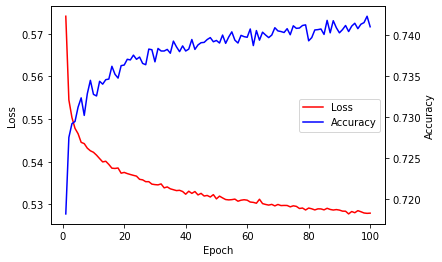

In [23]:
# Visualize Loss/Accuracy
import matplotlib.pyplot as plt
history_df = pd.DataFrame(fit_model.history,
                          index=range(1, len(fit_model.history["loss"]) + 1))

fig, ax = plt.subplots()
loss= ax.plot(history_df["loss"], color='red', label='Loss')
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")

ax2=ax.twinx()
acc=ax2.plot(history_df["accuracy"], color="blue", label="Accuracy")
ax2.set_ylabel("Accuracy")

curves=loss+acc
labs = [l.get_label() for l in curves]
ax.legend(curves, labs, loc="center right")

plt.show()

In [24]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5718 - accuracy: 0.7356
Loss: 0.5718474388122559, Accuracy: 0.7356268167495728


In [27]:
# Export and save model to HDF5 file
nn.save("AlphabetSoupCharity.h5")